In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (12,12)
plt.rc("font", size=14)
from scipy.stats import chi2, chi2_contingency
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('D:/Machine Learning/Kaggle Project/Income of Adults/adult_data.csv')
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
data.shape

(32561, 15)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# Understanding Data

In [5]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'salary'],
      dtype='object')

# Check the data types

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
data.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# Checking for duplicates

In [8]:
data.loc[data.duplicated()]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17040,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18555,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


In [9]:
data.drop_duplicates(inplace = True)

In [10]:
data.loc[data.duplicated()]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary


# Segregating numerical and categorical variables

In [11]:
cat_col = data.select_dtypes(include = ['object']).columns
num_col = data.select_dtypes(exclude = ['object']).columns

In [12]:
data_cat = data[cat_col]
data_num = data[num_col]

In [13]:
data_cat

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


# Value counts of object variables

In [14]:
for col in data_cat:
    vc = data[col].value_counts()
    print(col)
    print(pd.DataFrame({'Counts' : vc}))
    print('')

workclass
                   Counts
 Private            22673
 Self-emp-not-inc    2540
 Local-gov           2093
 ?                   1836
 State-gov           1298
 Self-emp-inc        1116
 Federal-gov          960
 Without-pay           14
 Never-worked           7

education
               Counts
 HS-grad        10494
 Some-college    7282
 Bachelors       5353
 Masters         1722
 Assoc-voc       1382
 11th            1175
 Assoc-acdm      1067
 10th             933
 7th-8th          645
 Prof-school      576
 9th              514
 12th             433
 Doctorate        413
 5th-6th          332
 1st-4th          166
 Preschool         50

marital_status
                        Counts
 Married-civ-spouse      14970
 Never-married           10667
 Divorced                 4441
 Separated                1025
 Widowed                   993
 Married-spouse-absent     418
 Married-AF-spouse          23

occupation
                    Counts
 Prof-specialty       4136
 Craft-repair  

In [15]:
for col in data_cat:
    data[col].replace(' ?', data[col].mode()[0], inplace = True)

In [16]:
for col in data_cat:
    vc = data[col].value_counts()
    print(col)
    print(pd.DataFrame({'Counts' : vc}))
    print('')

workclass
                   Counts
 Private            24509
 Self-emp-not-inc    2540
 Local-gov           2093
 State-gov           1298
 Self-emp-inc        1116
 Federal-gov          960
 Without-pay           14
 Never-worked           7

education
               Counts
 HS-grad        10494
 Some-college    7282
 Bachelors       5353
 Masters         1722
 Assoc-voc       1382
 11th            1175
 Assoc-acdm      1067
 10th             933
 7th-8th          645
 Prof-school      576
 9th              514
 12th             433
 Doctorate        413
 5th-6th          332
 1st-4th          166
 Preschool         50

marital_status
                        Counts
 Married-civ-spouse      14970
 Never-married           10667
 Divorced                 4441
 Separated                1025
 Widowed                   993
 Married-spouse-absent     418
 Married-AF-spouse          23

occupation
                    Counts
 Prof-specialty       5979
 Craft-repair         4094
 Exec-manageri

# Visualizing the object variables

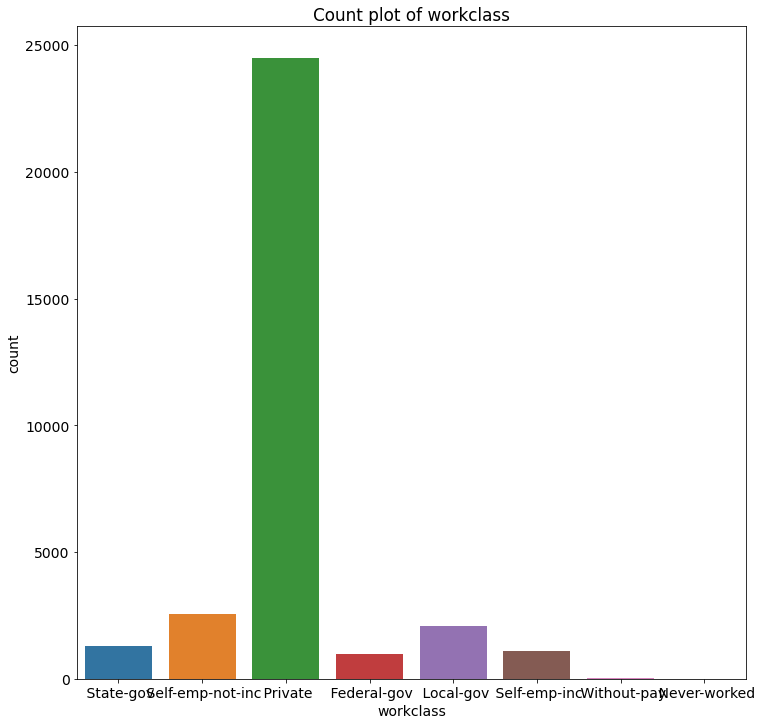

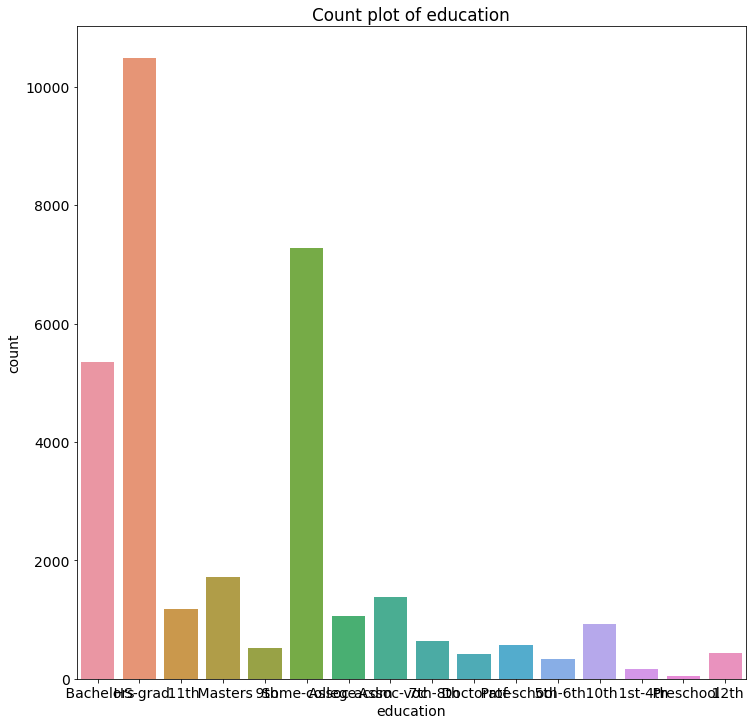

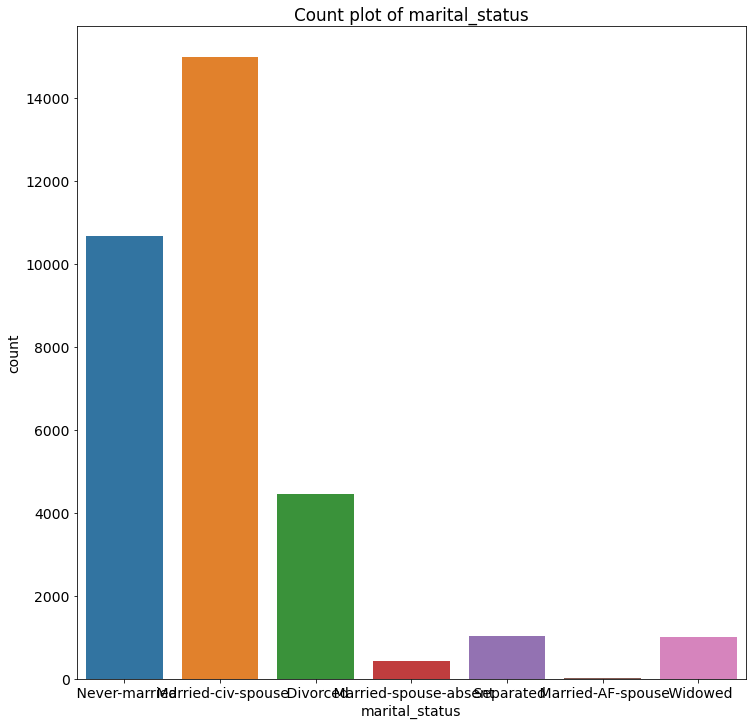

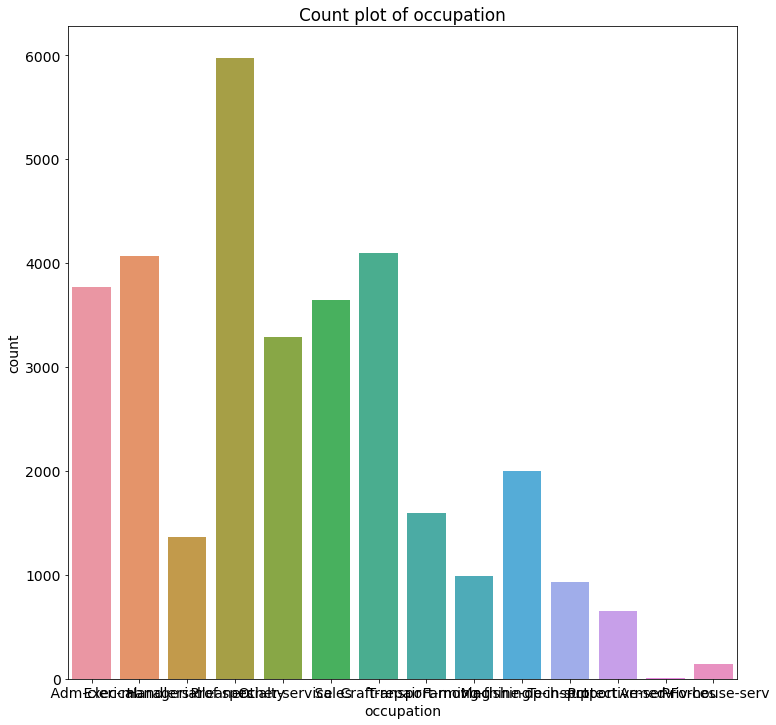

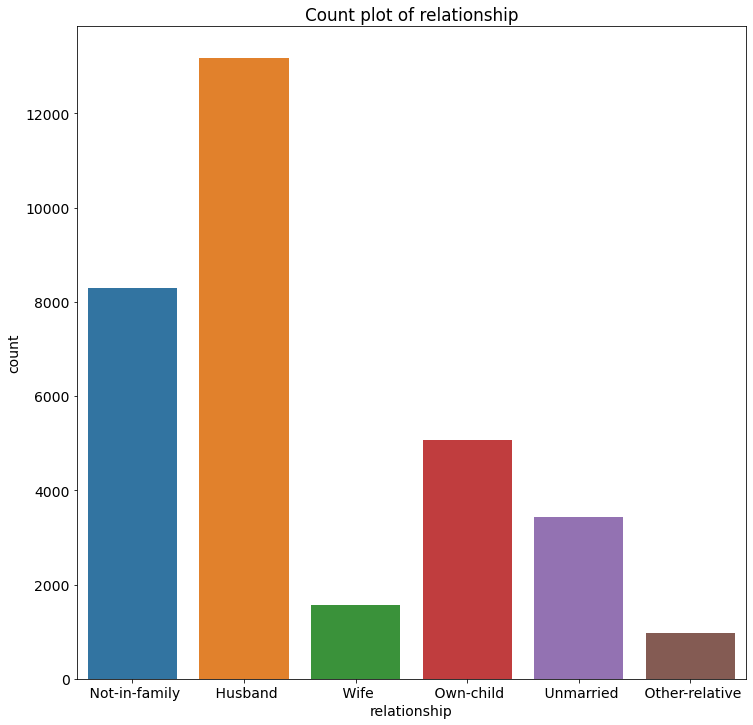

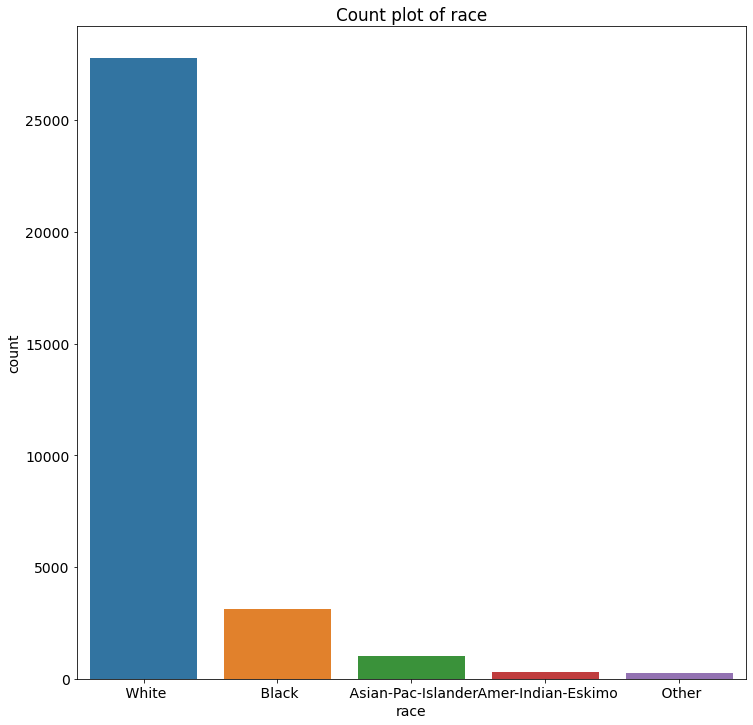

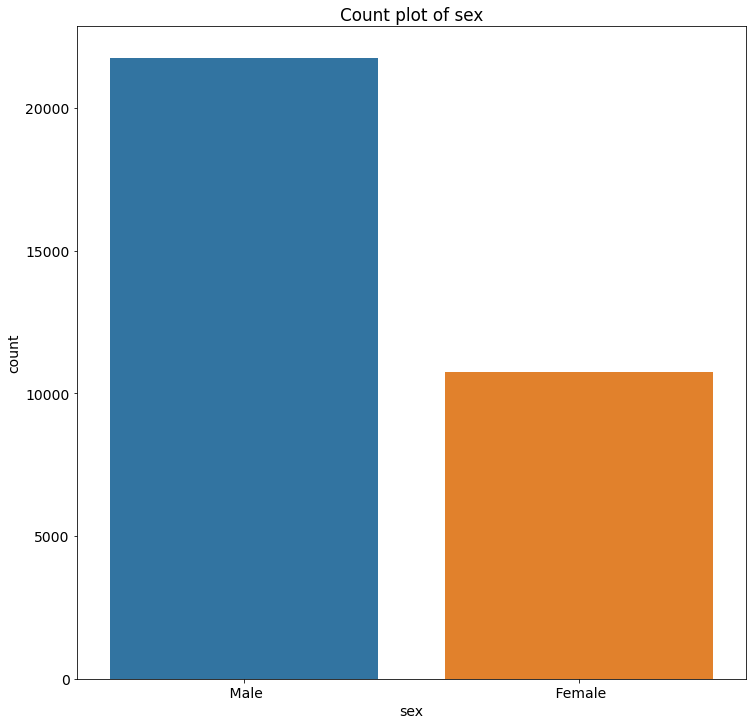

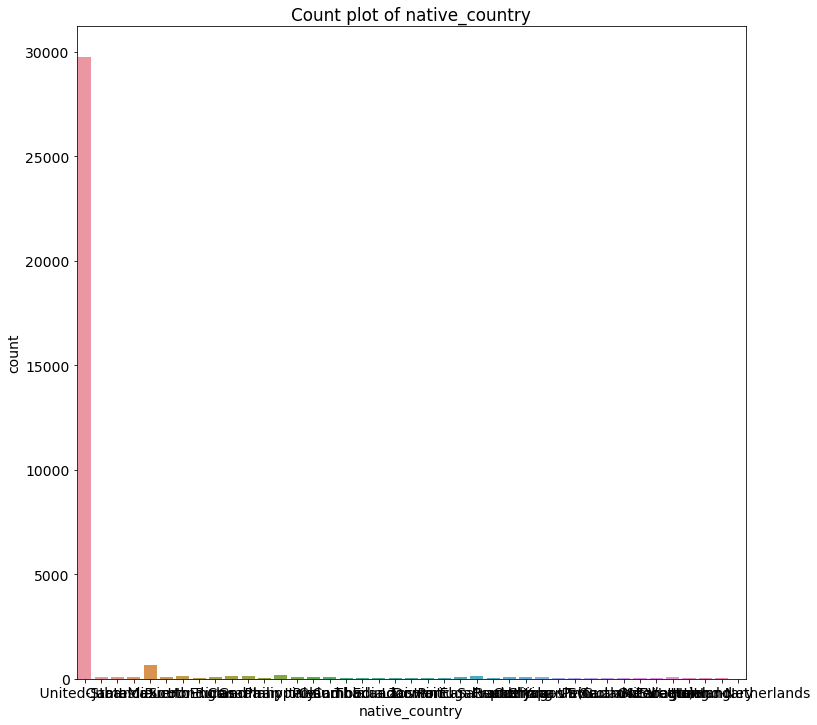

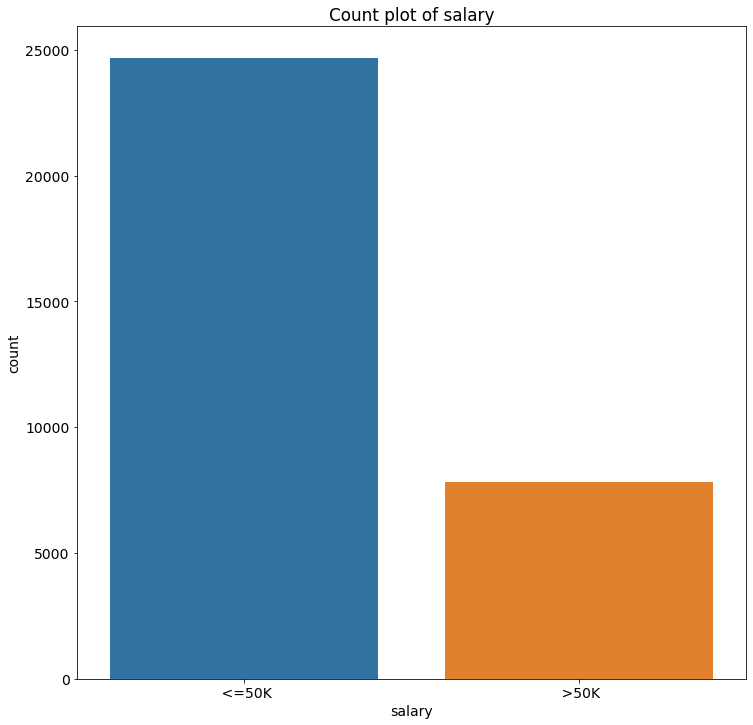

In [17]:
for col in data_cat:
    sns.countplot(data[col])
    plt.xlabel(col)
    plt.ylabel('count')
    plt.title('Count plot of {}'.format(col))
    plt.show()
    print('')

# Cross tab for object variable

In [18]:
for col in data_cat.columns[:-1]:
    print(col)
    ct = pd.crosstab(data[col], data.salary)
    print(chi2_contingency(ct, correction = False))
    print('')

workclass
(922.3498477209453, 7.156800770833626e-195, 7, array([[7.28711313e+02, 2.31288687e+02],
       [1.58874248e+03, 5.04257522e+02],
       [5.31351999e+00, 1.68648001e+00],
       [1.86041516e+04, 5.90484836e+03],
       [8.47126902e+02, 2.68873098e+02],
       [1.92804868e+03, 6.11951317e+02],
       [9.85278421e+02, 3.12721579e+02],
       [1.06270400e+01, 3.37296001e+00]]))

education
(4428.404687554787, 0.0, 15, array([[ 708.21630759,  224.78369241],
       [ 891.91228448,  283.08771552],
       [ 328.67916526,  104.32083474],
       [ 126.00633125,   39.99366875],
       [ 252.01266251,   79.98733749],
       [ 489.60291361,  155.39708639],
       [ 390.16418232,  123.83581768],
       [ 809.93226173,  257.06773827],
       [1049.0406614 ,  332.9593386 ],
       [4063.32464579, 1289.67535421],
       [ 313.49767956,   99.50232044],
       [7965.72554323, 2528.27445677],
       [1307.12591819,  414.87408181],
       [  37.95371423,   12.04628577],
       [ 437.22678796,  138

# Count plot for predict variable with response variable

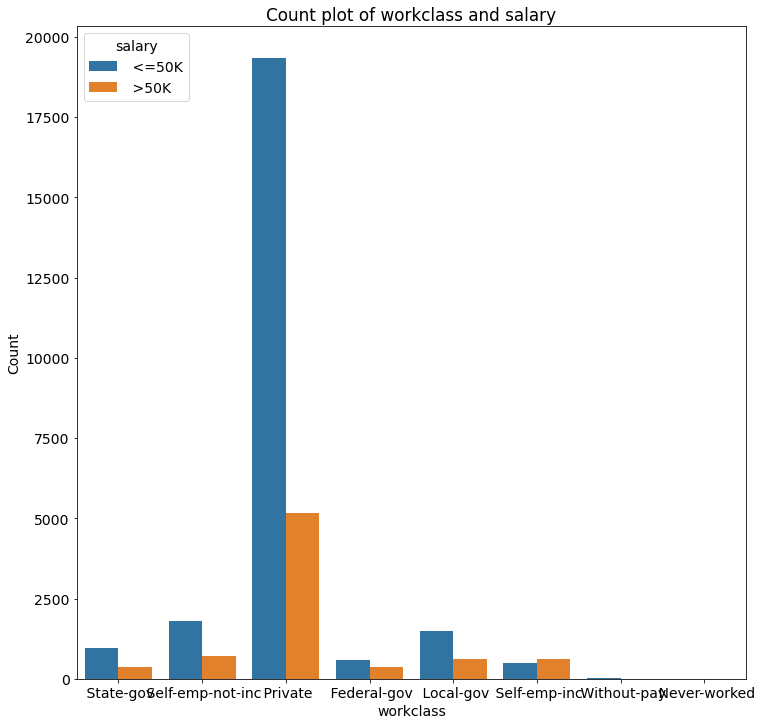

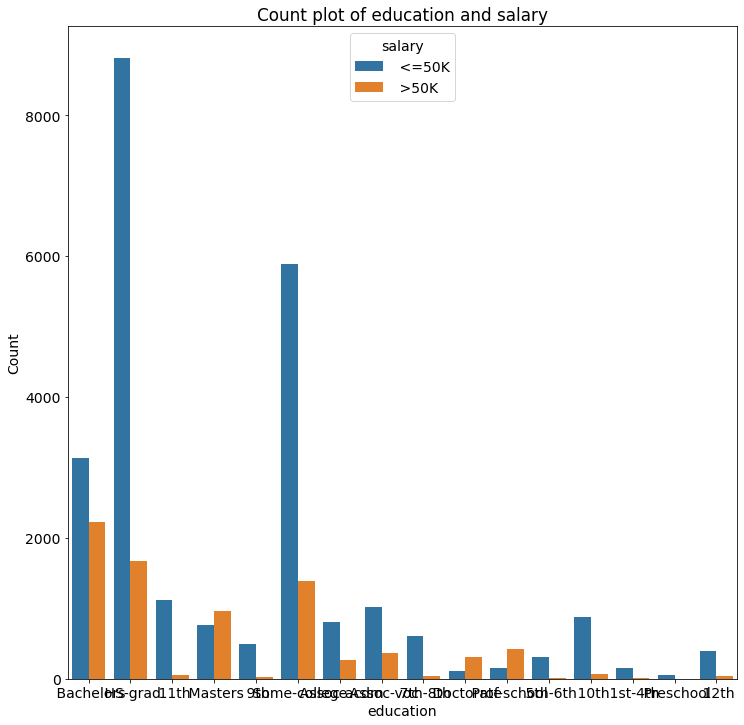

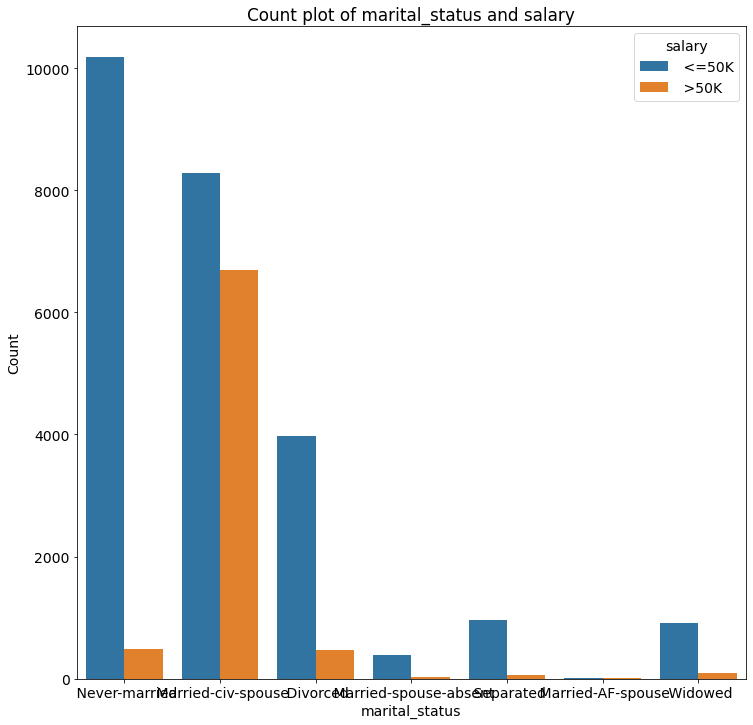

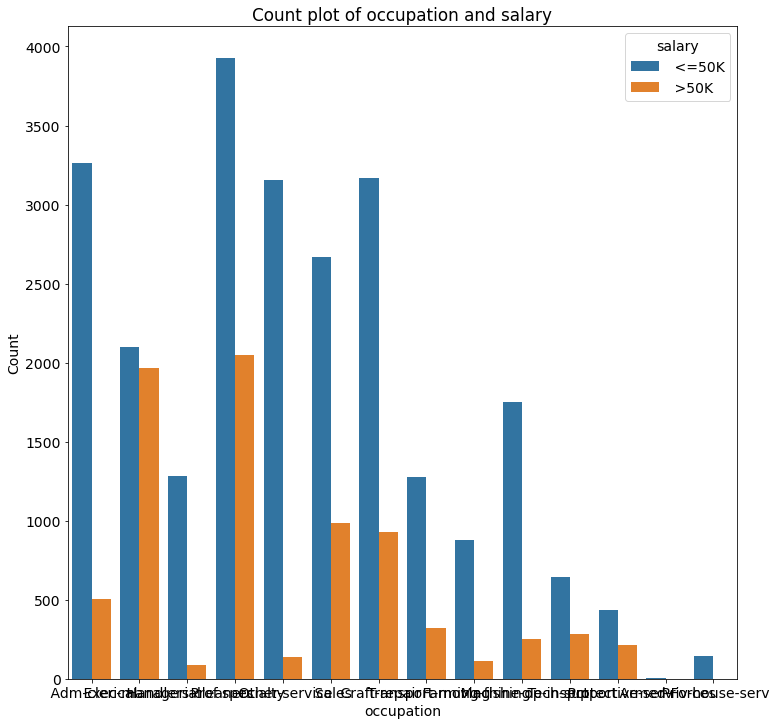

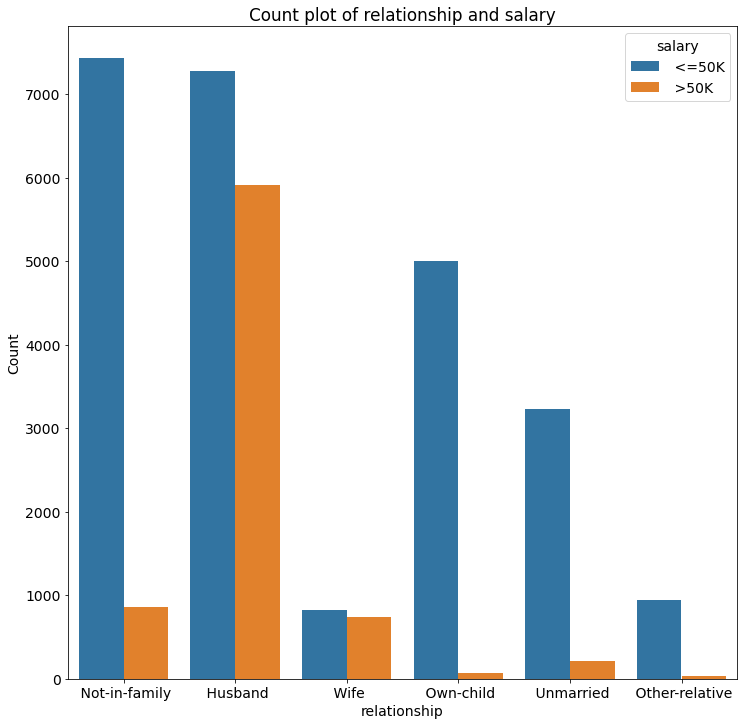

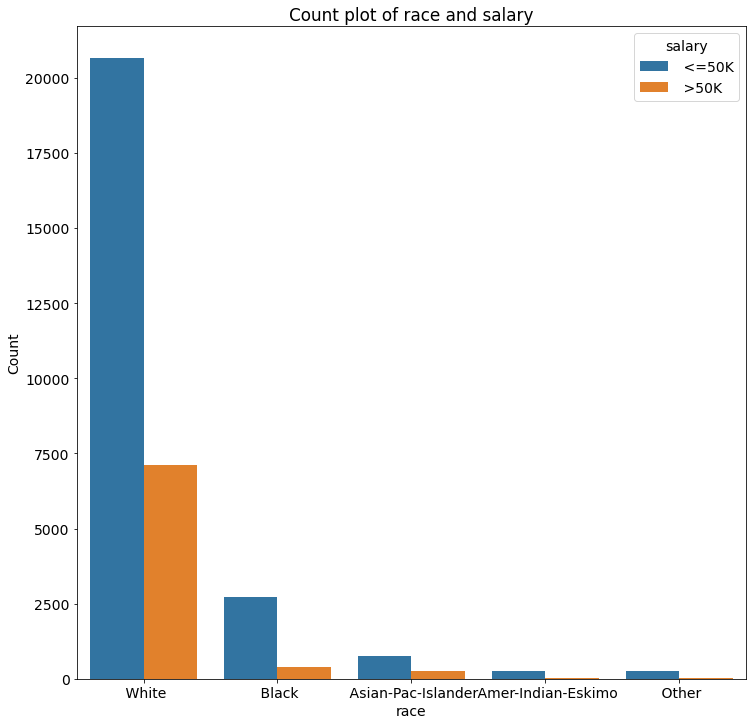

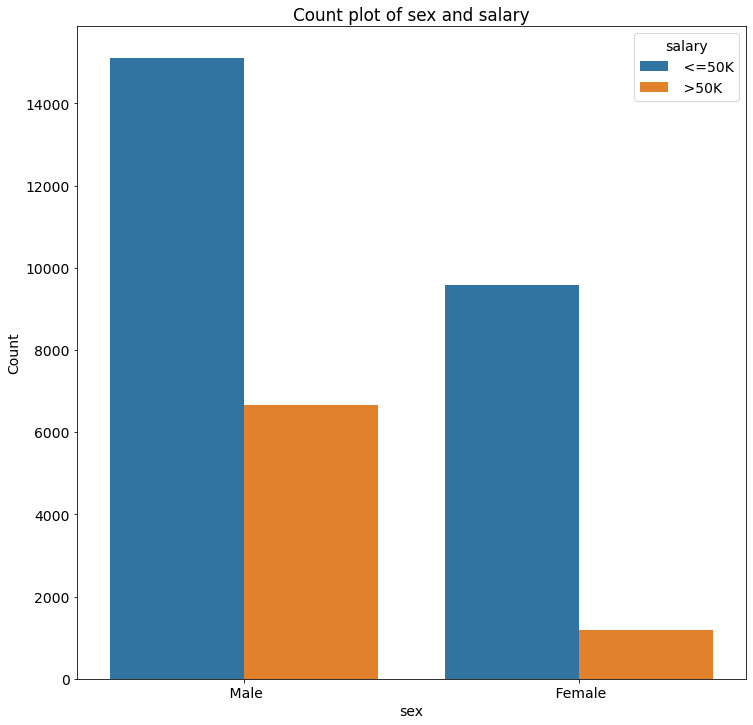

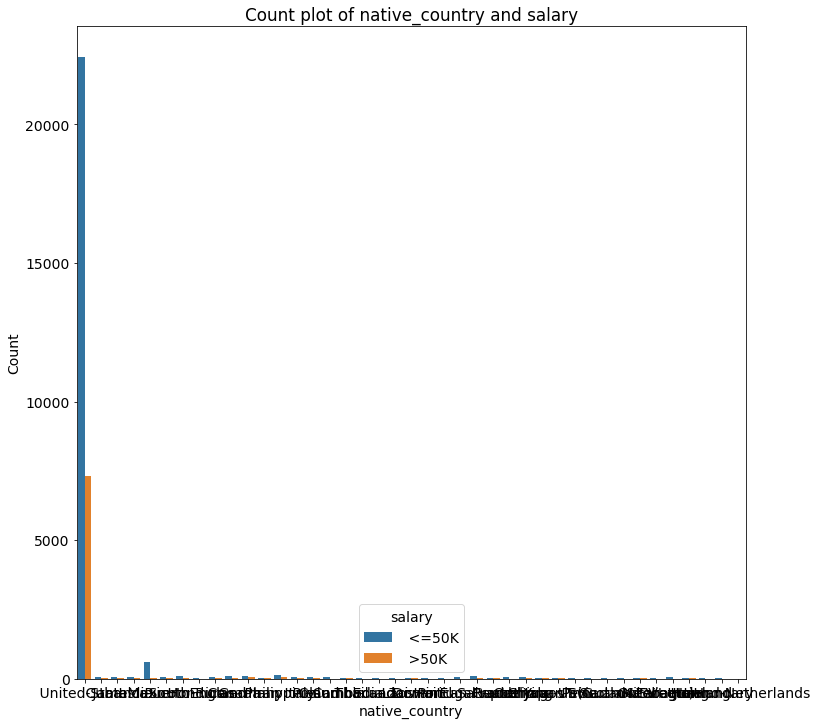

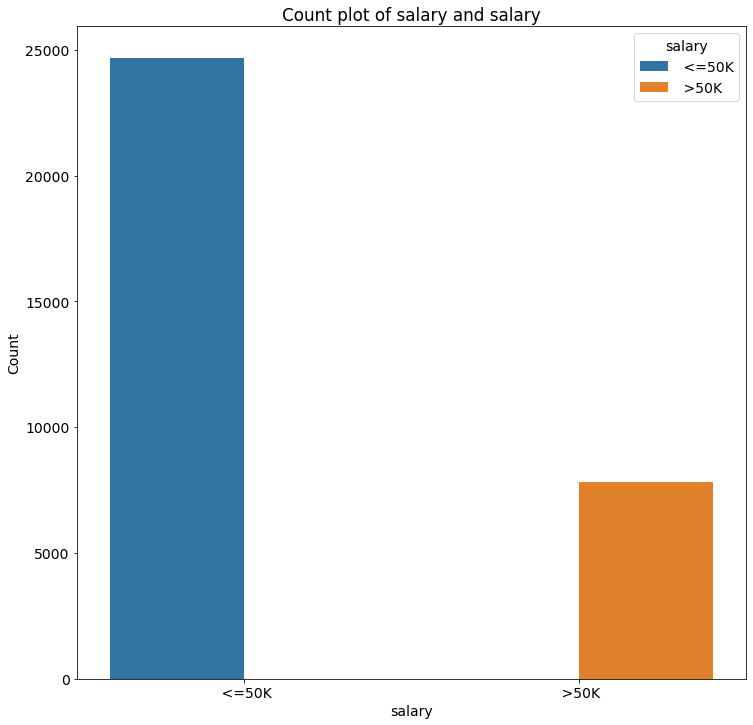

In [19]:
for col in data_cat[:-1]:
    sns.countplot(data[col], hue = data.salary)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title('Count plot of {0} and salary'.format(col))
    plt.show()
    print('')

# 

# 

# Visualizing for continues variable

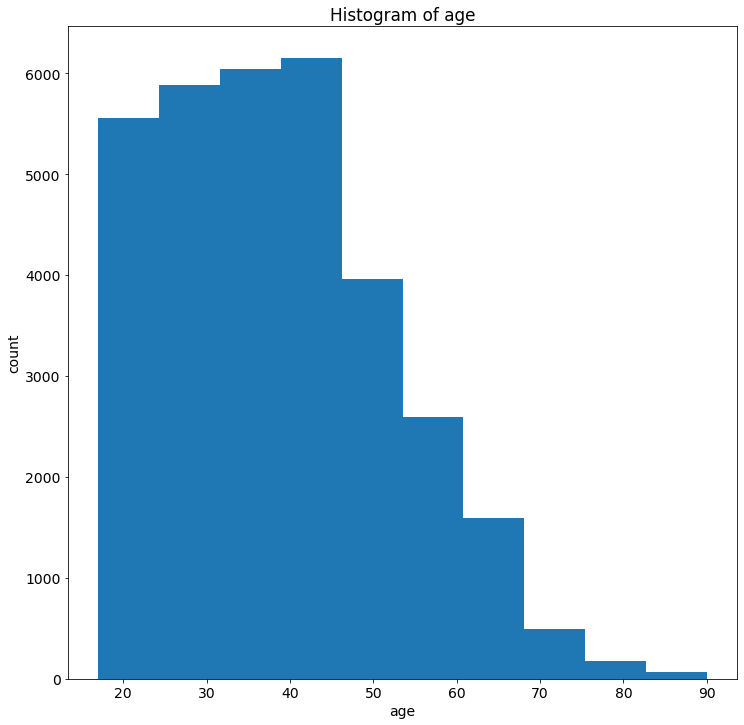

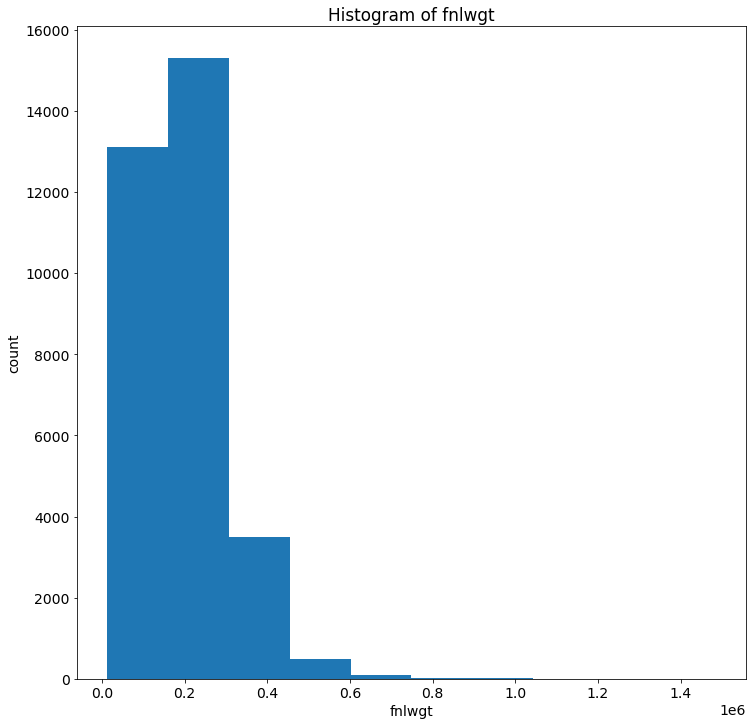

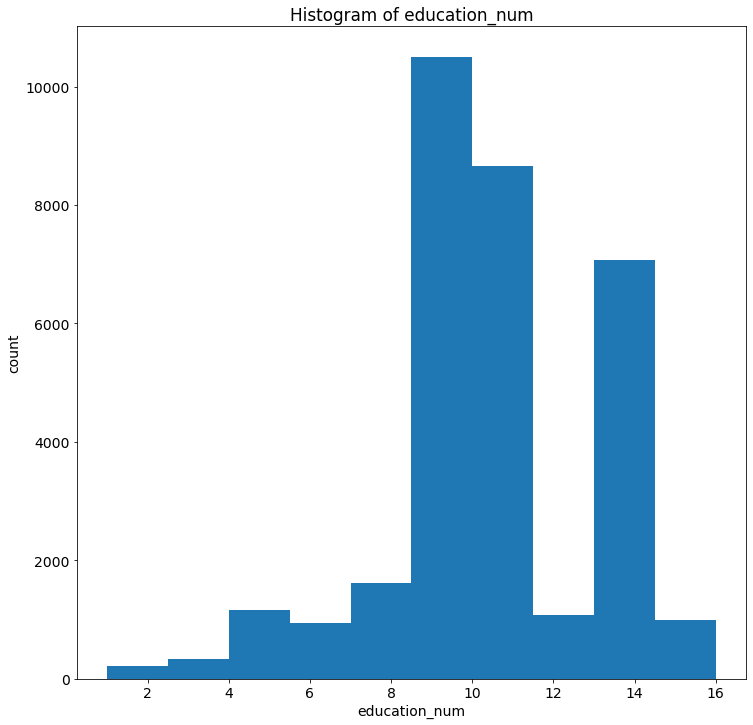

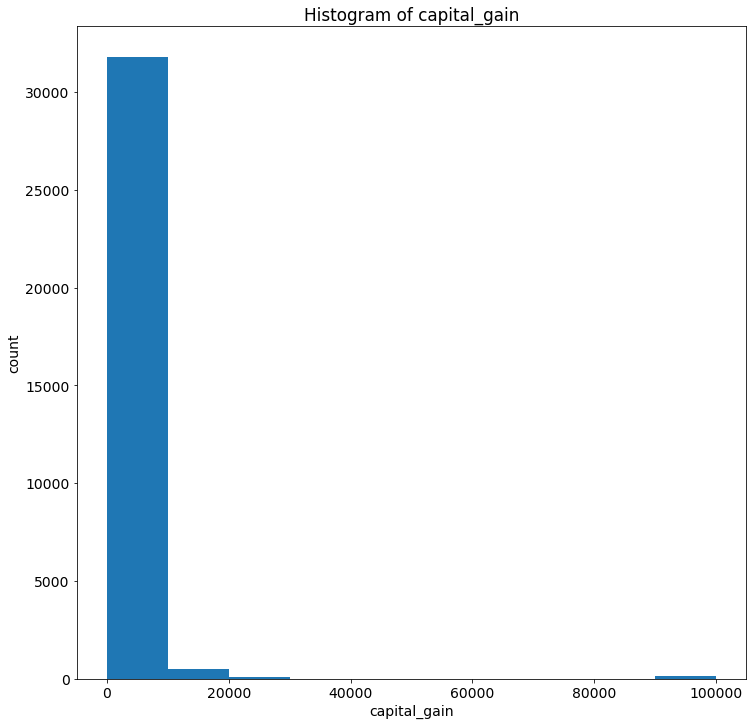

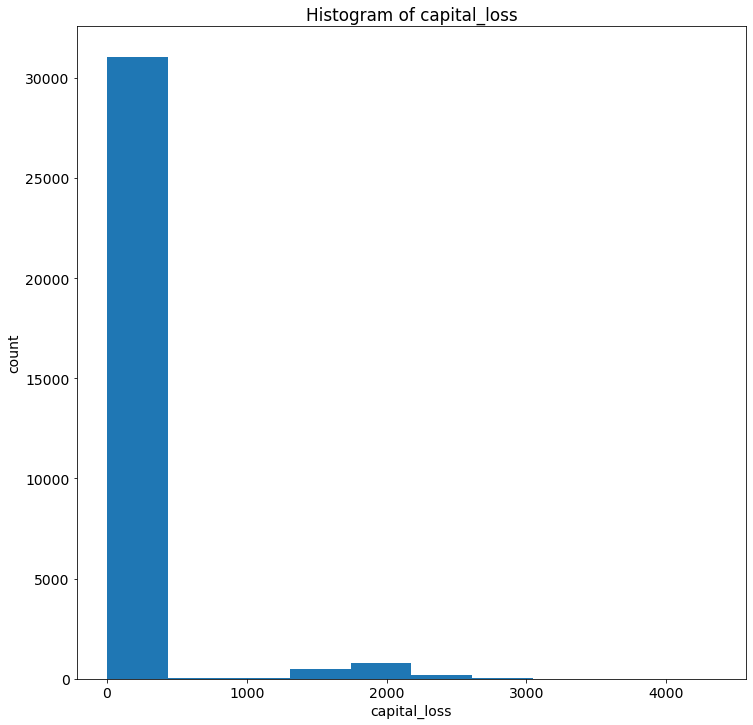

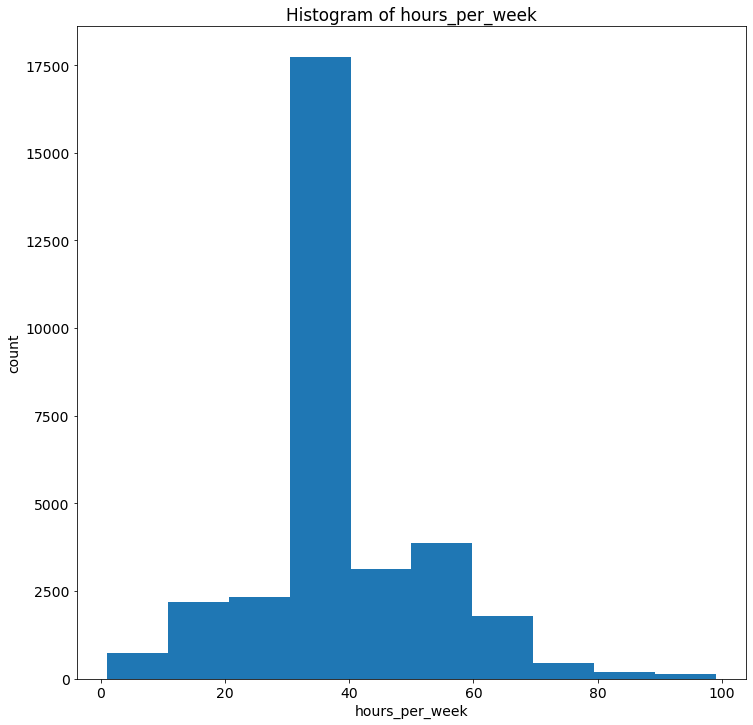

In [20]:
for col in data_num:
    plt.hist(data[col])
    plt.xlabel(col)
    plt.ylabel('count')
    plt.title('Histogram of {}'.format(col))
    plt.show()
    print('')

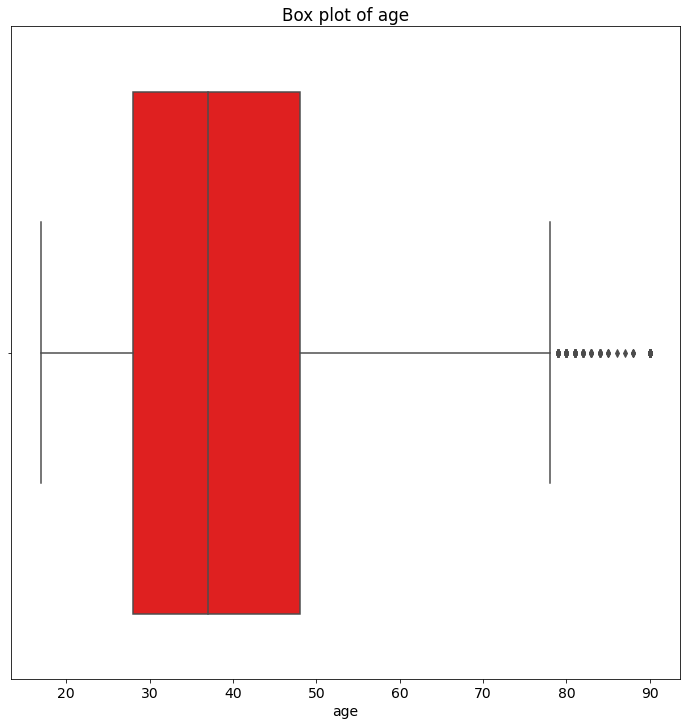

IQR of age is 20.0
Upper_limit of age is 78.0
Lower_limit of age is -2.0
Length of Upper_limit of age is 142
Length of Lower_limit of age is 0



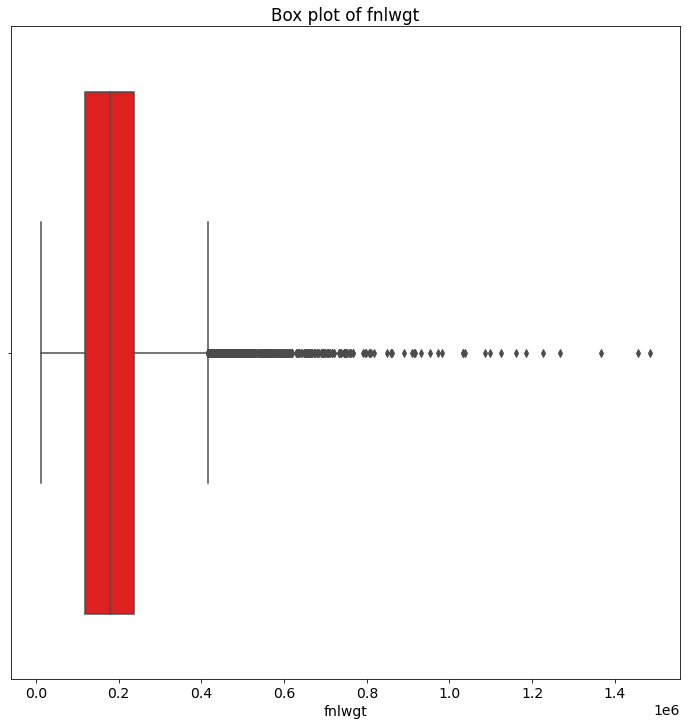

IQR of fnlwgt is 119166.0
Upper_limit of fnlwgt is 415742.0
Lower_limit of fnlwgt is -60922.0
Length of Upper_limit of fnlwgt is 993
Length of Lower_limit of fnlwgt is 0



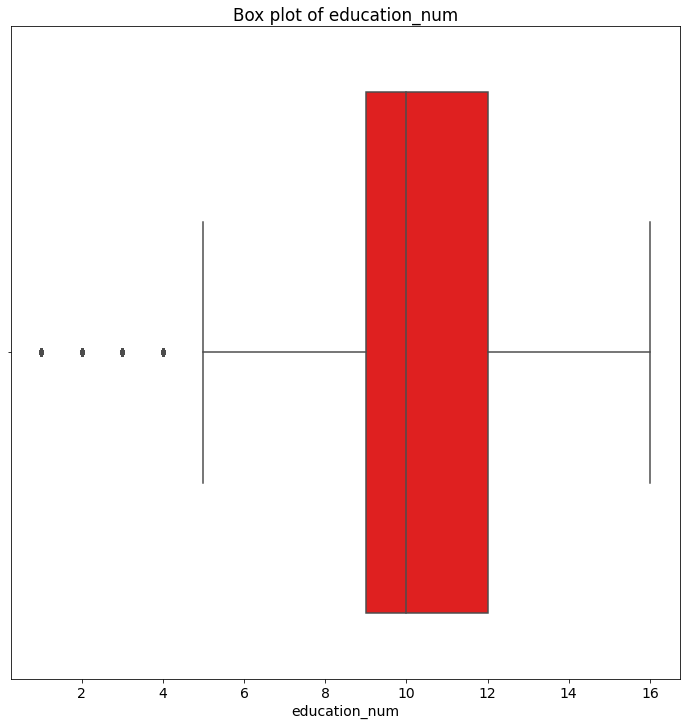

IQR of education_num is 3.0
Upper_limit of education_num is 16.5
Lower_limit of education_num is 4.5
Length of Upper_limit of education_num is 0
Length of Lower_limit of education_num is 1193



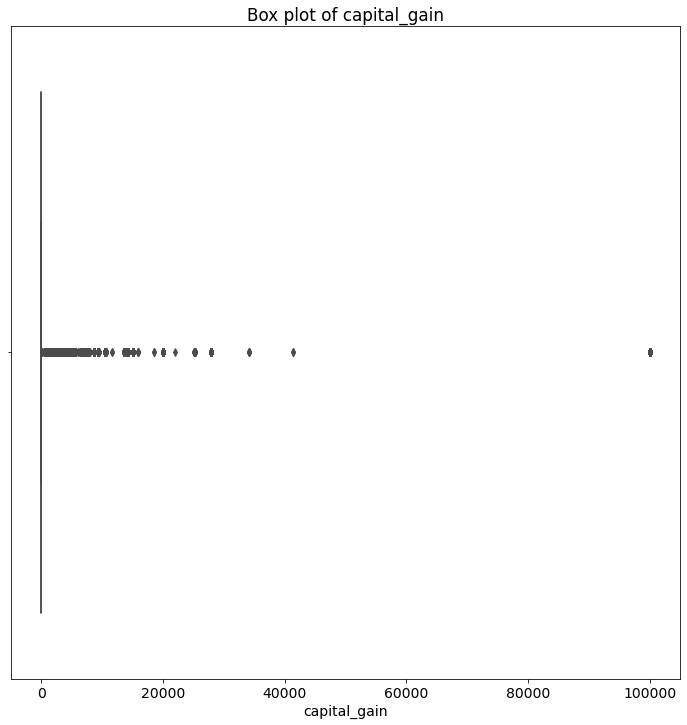

IQR of capital_gain is 0.0
Upper_limit of capital_gain is 0.0
Lower_limit of capital_gain is 0.0
Length of Upper_limit of capital_gain is 2712
Length of Lower_limit of capital_gain is 0



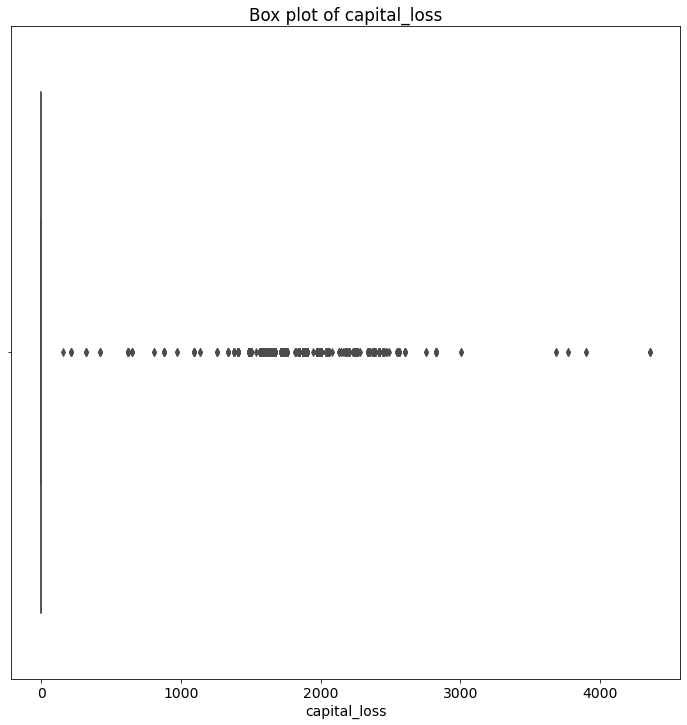

IQR of capital_loss is 0.0
Upper_limit of capital_loss is 0.0
Lower_limit of capital_loss is 0.0
Length of Upper_limit of capital_loss is 1519
Length of Lower_limit of capital_loss is 0



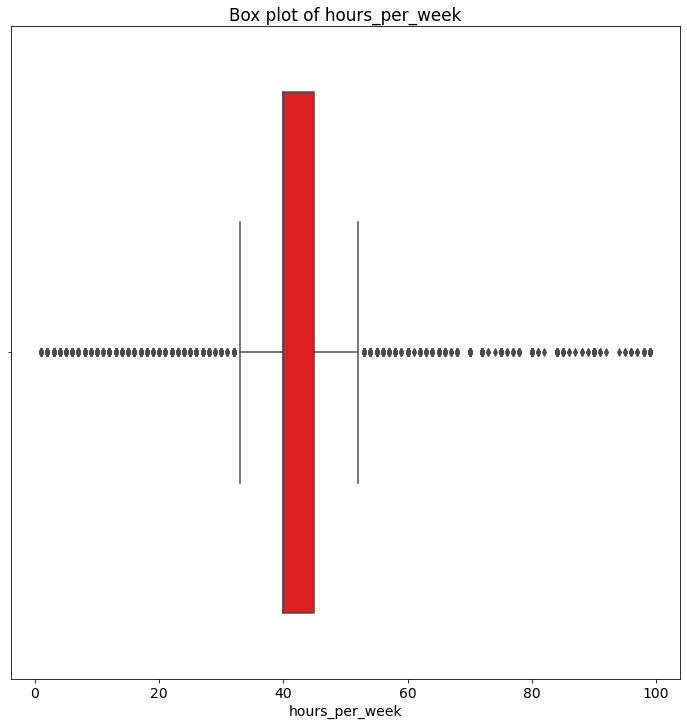

IQR of hours_per_week is 5.0
Upper_limit of hours_per_week is 52.5
Lower_limit of hours_per_week is 32.5
Length of Upper_limit of hours_per_week is 3491
Length of Lower_limit of hours_per_week is 5511



In [21]:
for col in data_num:
    sns.boxplot(data[col], color = 'r')
    plt.xlabel(col)
    plt.title('Box plot of {}'.format(col))
    plt.show()
    IQR = data[col].quantile(0.75)-data[col].quantile(0.25)
    print(f'IQR of {col} is {IQR}')
    upper_limit= data[col].quantile(0.75)+ (1.5*IQR)
    print(f'Upper_limit of {col} is {upper_limit}')
    lower_limit= data[col].quantile(0.25)- (1.5*IQR)
    print(f'Lower_limit of {col} is {lower_limit}')
    length_upper = len(data[col][data[col]>upper_limit])
    print(f'Length of Upper_limit of {col} is {length_upper}')
    length_lower = len(data[col][data[col]<lower_limit])
    print(f'Length of Lower_limit of {col} is {length_lower}')
    print('')

In [22]:
data['age'] = np.where(data['age']>78.0, 78.0, data['age']) 
data['fnlwgt'] = np.where(data['fnlwgt']>415742.0, 415742.0, data['fnlwgt']) 
data['education_num'] = np.where(data['education_num']<5, 5, data['education_num']) 
data['capital_gain'] = np.where(data['capital_gain']>0.0, 0.0, data['capital_gain']) 
data['capital_loss'] = np.where(data['capital_loss']>0.0, 0.0, data['capital_loss']) 
data['hours_per_week'] = np.where(data['hours_per_week']>52.5, 52.5, data['hours_per_week']) 
data['hours_per_week'] = np.where(data['hours_per_week']<32.5, 32.5, data['hours_per_week']) 


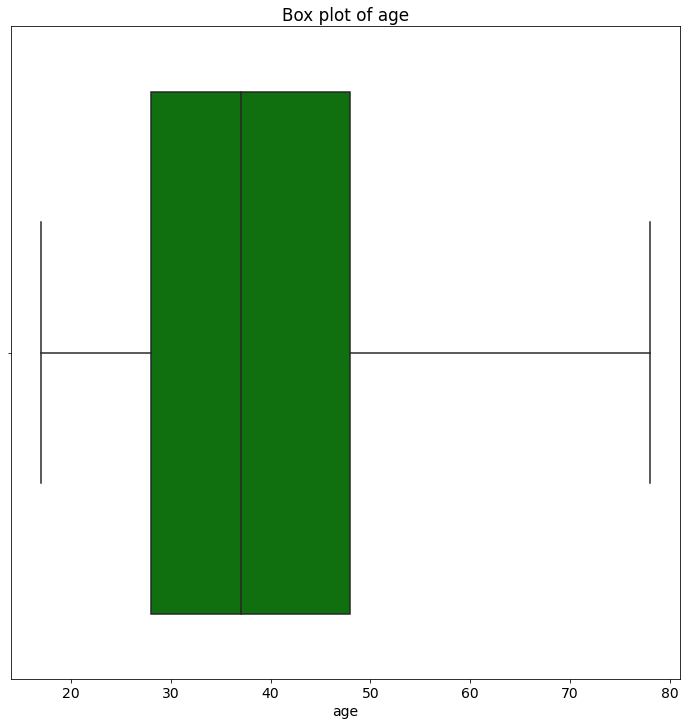

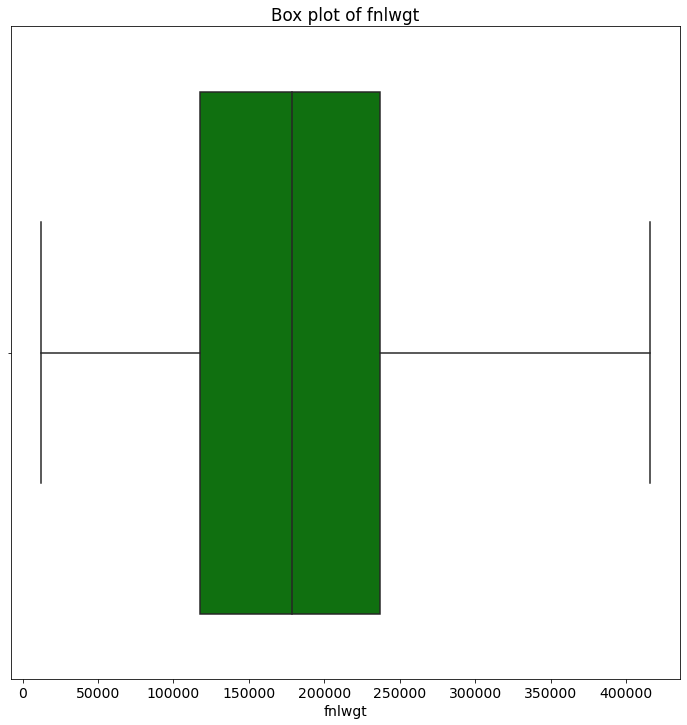

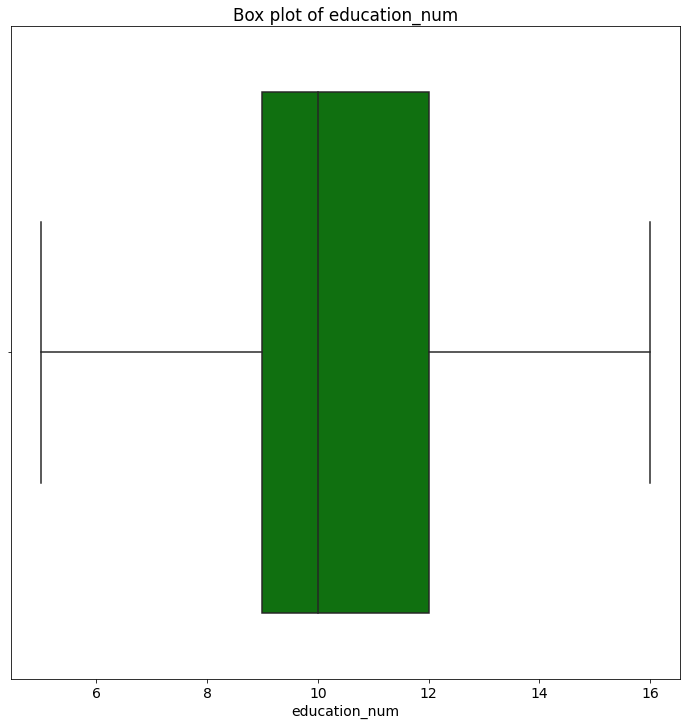

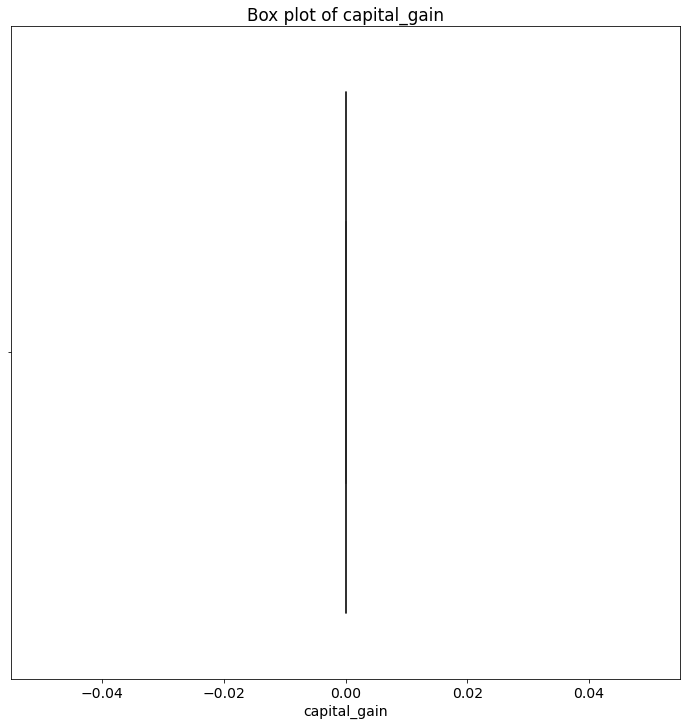

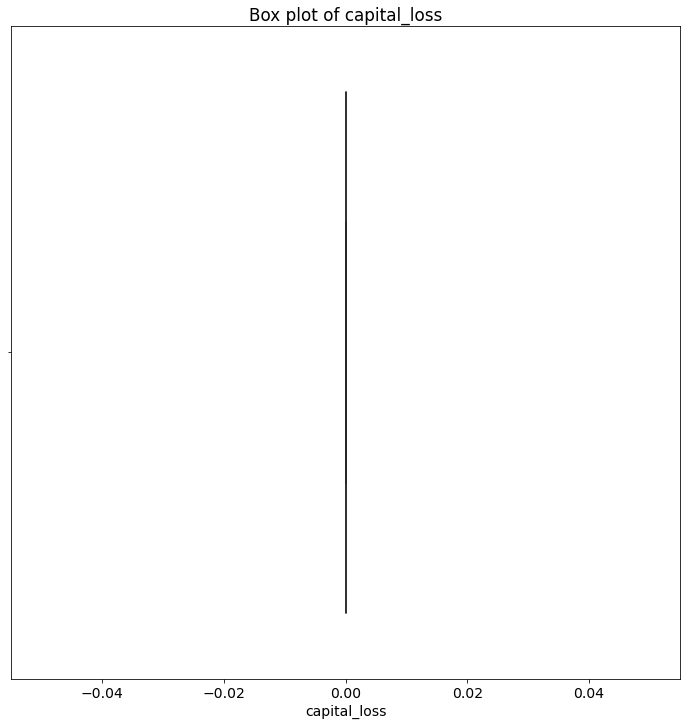

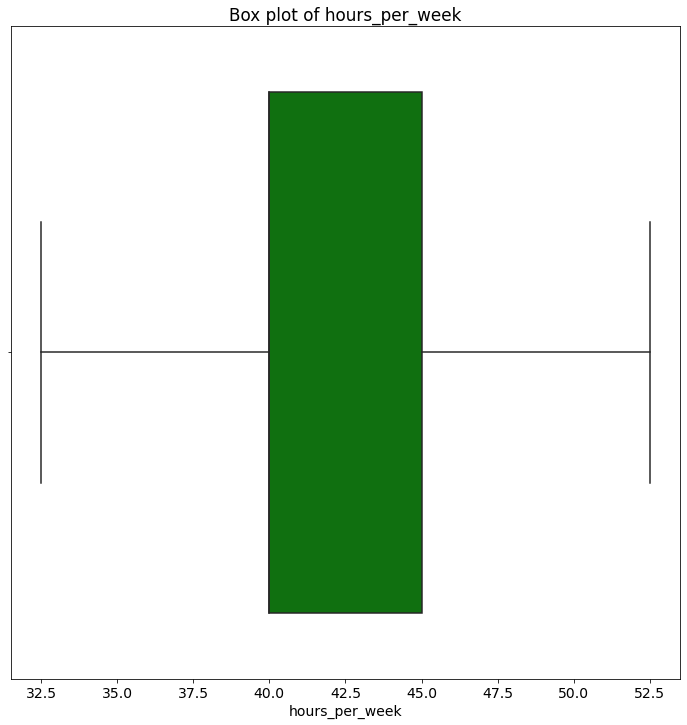

In [23]:
for col in data_num:
    sns.boxplot(data[col], color = 'g')
    plt.xlabel(col)
    plt.title('Box plot of {}'.format(col))
    plt.show()
    print('')

**As per value counts capital-gain and capital-loss have only one category**

**so, it's NOT A GOOD PREDICTOR**

In [24]:
data_num.drop(['capital_gain', 'capital_loss'], axis = 1, inplace = True)

# Statistical test

In [25]:
cat_1 = data[data['salary'] == ' <=50K']
cat_2 = data[data['salary'] == ' >50K'] 
for col in data_num.columns:
    print(col)
    print(ttest_ind(cat_1[col], cat_2[col]))
    print('')

age
Ttest_indResult(statistic=-43.772365172980415, pvalue=0.0)

fnlwgt
Ttest_indResult(statistic=1.5188180114124985, pvalue=0.12881802774808931)

education_num
Ttest_indResult(statistic=-66.24295033046211, pvalue=0.0)

hours_per_week
Ttest_indResult(statistic=-50.793573310410224, pvalue=0.0)



**As per statistical test fnlwgt is NOT A GOOD PREDICTOR**

# 

# 

# Train Test Split

In [26]:
x = data.drop(['capital_gain', 'capital_loss', 'fnlwgt', 'salary'], axis = 1)
y = data['salary']

In [27]:
x.shape

(32537, 11)

In [28]:
y.shape

(32537,)

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2, random_state = 100)

In [30]:
x_train.shape

(26029, 11)

# 

# Join horizontally x_train and y_train

In [31]:
train = x_train.join(y_train)

In [32]:
train.shape

(26029, 12)

# Join horizontally x_test and y_test

In [33]:
test = x_test.join(y_test)

In [34]:
test.shape

(6508, 12)

# 

# Count the imbalanced categories

In [35]:
l_salary = train[train.salary == ' <=50K']
len(l_salary)

19796

In [36]:
salary = train[train.salary == ' >50K']
len(salary)

6233

# 

# Make minority class = majority class

In [37]:
salary_os = resample(salary, replace = True, n_samples = len(l_salary), random_state = 27)

In [38]:
train_os = pd.concat([l_salary, salary_os])

In [39]:
train_os.salary.value_counts()

 >50K     19796
 <=50K    19796
Name: salary, dtype: int64

In [40]:
train_os.isnull().sum()

age               0
workclass         0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
hours_per_week    0
native_country    0
salary            0
dtype: int64

# 

# Now make oversampled x_train(os) & y_train(os)

In [41]:
x_trainos = train_os.loc[:, train_os.columns != 'salary']
y_trainos = train_os.loc[:, train_os.columns == 'salary']

In [42]:
x_trainos.shape

(39592, 11)

In [43]:
y_trainos.shape

(39592, 1)

# 

# Model with Good Predictor

In [44]:

model_1 = smf.glm(formula = 'salary ~ age + workclass + education + education_num + marital_status + occupation + relationship + race + sex + hours_per_week + native_country', data = train_os, family = sm.families.Binomial()).fit()
print(model_1.summary())

                          Generalized Linear Model Regression Results                          
Dep. Variable:     ['salary[ <=50K]', 'salary[ >50K]']   No. Observations:                39592
Model:                                             GLM   Df Residuals:                    39498
Model Family:                                 Binomial   Df Model:                           93
Link Function:                                   logit   Scale:                          1.0000
Method:                                           IRLS   Log-Likelihood:                    nan
Date:                                 Sun, 16 Jan 2022   Deviance:                   1.0507e+06
Time:                                         22:31:43   Pearson chi2:                 5.14e+19
No. Iterations:                                    100                                         
Covariance Type:                             nonrobust                                         
                                        

# 

# 

# VIF

In [45]:
x_trainos1 = x_trainos[['age', 'education_num', 'hours_per_week']]

In [46]:
vif_trn = pd.DataFrame()
vif_trn["feature"] = x_trainos1.columns

In [47]:
# calculating VIF for each feature

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_trn["VIF"] = [variance_inflation_factor(x_trainos1.values, i) for i in range(len(x_trainos1.columns))]
  
print(vif_trn)

          feature        VIF
0             age   9.978876
1   education_num  17.744226
2  hours_per_week  21.713888


# 

# 

# Model With VIF < 10 Columns

In [48]:
model_2 = smf.glm(formula = 'salary ~ age + workclass + education + education_num + marital_status + occupation + relationship + race + sex + native_country', data = train_os, family = sm.families.Binomial()).fit()
print(model_2.summary())

                          Generalized Linear Model Regression Results                          
Dep. Variable:     ['salary[ <=50K]', 'salary[ >50K]']   No. Observations:                39592
Model:                                             GLM   Df Residuals:                    39499
Model Family:                                 Binomial   Df Model:                           92
Link Function:                                   logit   Scale:                          1.0000
Method:                                           IRLS   Log-Likelihood:                    nan
Date:                                 Sun, 16 Jan 2022   Deviance:                   1.0873e+06
Time:                                         22:32:12   Pearson chi2:                 5.32e+19
No. Iterations:                                    100                                         
Covariance Type:                             nonrobust                                         
                                        

In [49]:
x_trainos1 = x_trainos[['age', 'education_num']]

In [50]:
vif_trn = pd.DataFrame()
vif_trn["feature"] = x_trainos1.columns

In [51]:
# calculating VIF for each feature

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_trn["VIF"] = [variance_inflation_factor(x_trainos1.values, i) for i in range(len(x_trainos1.columns))]
  
print(vif_trn)

         feature       VIF
0            age  7.823335
1  education_num  7.823335


# 

In [52]:
y_test = test.loc[:, test.columns == 'salary']
y_test

,salary
13799,<=50K
21389,<=50K
4980,<=50K
29865,>50K
9224,<=50K
...,...
7977,>50K
25081,<=50K
2019,<=50K
21268,<=50K


In [53]:
predictions = model_2.predict(x_test)
pred_1 = [' <=50K' if x < 0.5 else ' >50K' for x in predictions]
pred_1

[' >50K',
 ' >50K',
 ' >50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' >50K',
 ' >50K',
 ' >50K',
 ' >50K',
 ' >50K',
 ' <=50K',
 ' >50K',
 ' >50K',
 ' <=50K',
 ' >50K',
 ' >50K',
 ' >50K',
 ' >50K',
 ' >50K',
 ' <=50K',
 ' <=50K',
 ' >50K',
 ' >50K',
 ' <=50K',
 ' <=50K',
 ' >50K',
 ' <=50K',
 ' >50K',
 ' >50K',
 ' <=50K',
 ' >50K',
 ' >50K',
 ' >50K',
 ' >50K',
 ' <=50K',
 ' >50K',
 ' >50K',
 ' >50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' >50K',
 ' >50K',
 ' <=50K',
 ' >50K',
 ' >50K',
 ' >50K',
 ' <=50K',
 ' >50K',
 ' >50K',
 ' <=50K',
 ' >50K',
 ' <=50K',
 ' >50K',
 ' <=50K',
 ' >50K',
 ' >50K',
 ' <=50K',
 ' >50K',
 ' <=50K',
 ' >50K',
 ' <=50K',
 ' <=50K',
 ' >50K',
 ' >50K',
 ' >50K',
 ' <=50K',
 ' <=50K',
 ' >50K',
 ' <=50K',
 ' >50K',
 ' <=50K',
 ' >50K',
 ' >50K',
 ' <=50K',
 ' >50K',
 ' >50K',
 ' >50K',
 ' >50K',
 ' >50K',
 ' >50K',
 ' >50K',
 ' <=50K',
 ' <=50K',
 ' >50K',
 ' >50K',
 ' >50K',
 ' <=50K',
 ' <=50K',
 ' <=50K',
 ' >50K',
 '

# 

In [54]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(test["salary"], pred_1))
print(classification_report(test["salary"], pred_1, digits = 3))

[[1245 3657]
 [1091  515]]
              precision    recall  f1-score   support

       <=50K      0.533     0.254     0.344      4902
        >50K      0.123     0.321     0.178      1606

    accuracy                          0.270      6508
   macro avg      0.328     0.287     0.261      6508
weighted avg      0.432     0.270     0.303      6508



# 

In [57]:
x_trainos = pd.get_dummies(x_trainos)
x_test = pd.get_dummies(x_test)

In [60]:
y_trainos['salary'].replace([' <=50K', ' >50K'], [0, 1], inplace = True)

In [61]:
y_trainos

,salary
15859,0
27261,0
19418,0
19181,0
31223,0
...,...
5944,1
22272,1
9187,1
15604,1


# 

# 

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score

In [62]:
clf_reg = LogisticRegression()
clf_reg.fit(x_trainos, y_trainos)
y_score = clf_reg.predict_proba(x_trainos)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_trainos, y_score)
auc_score = roc_auc_score(y_trainos, y_score)
print('roc_auc_score for Logistic Regression: ', auc_score)

roc_auc_score for Logistic Regression:  0.8844161179023002


# 

# 

# Plot

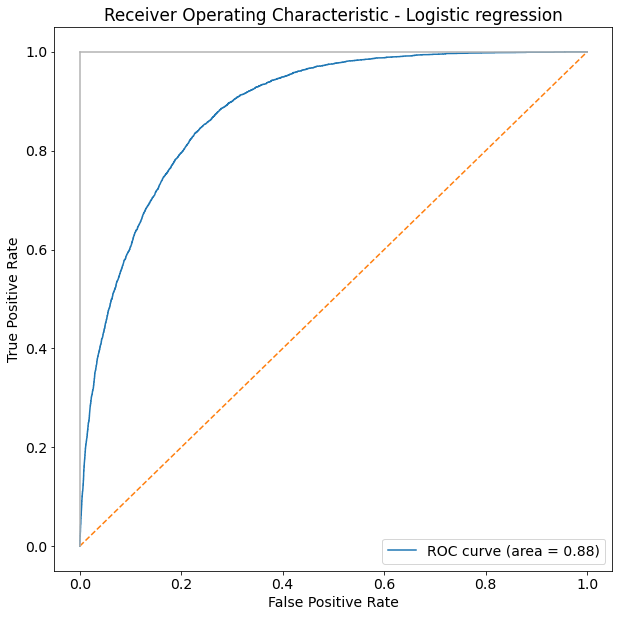

In [63]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Logistic regression')
plt.plot(false_positive_rate, true_positive_rate, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")
plt.show()